# Lab 1: Chocolate Sales Analysis
This lab explores a dataset of chocolate sales across regions. We'll perform data loading, cleaning, EDA, and basic modeling.

**Author**: Kiruthikaa NS

**Repo Name**: ml-course-projects

**Date**: October 2025  

**GitHub Repo**: [View this project on GitHub](https://github.com/Kiruthikaa2512/ml-course-projects)  

## Step 1: Import Libraries

We begin by importing the necessary Python libraries. These include:

- `pandas` for data manipulation
- `matplotlib.pyplot` and `seaborn` for visualization
- `sklearn.model_selection` for splitting the data later



In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset

In this step, we load the chocolate sales dataset into a pandas DataFrame DataFrame using `pd.read_csv()`. For clarity and convention, we name our DataFrame `df`. The dataset is stored as a CSV file and contains approximately 1000 rows of sales data across different regions.

This step helps us inspect the structure of the dataset and prepare for cleaning and exploration.

Loading the dataset is the foundation of any data analysis workflow. It allows us to:
- Inspect the structure and contents of the data
- Identify missing values or formatting issues
- Begin exploratory analysis and modeling

The dataset is located at: C:\Projects\ml-course-projects\data\Chocolate Sales.csv

In [44]:

# Define the file path using a raw string
file_path = r"C:\Projects\ml-course-projects\data\Chocolate Sales.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

## Step 3: Initial Exploration

Now that the dataset is loaded, we’ll inspect its structure and contents. This helps us:

- Understand the types of features (categorical vs numerical)
- Identify missing values (NaN)
- Get a sense of how many records we’re working with

We use the following methods:
- `df.head(n)` to preview the first few rows
- `df.tail(n)` to see the last few rows
- `df.info()` to get column types and non-null counts
- `df.describe()` to summarize numerical columns
- `df.isnull().sum()` to count missing values per column

In [45]:
# Step 3: Explore the data
print("Column names:")
print(df.columns)

print("\nFirst 10 rows:")
print(df.head(10))

print("\nLast 5 rows:")
print(df.tail(5))

print("\nDataFrame info:")
df.info()

print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

Column names:
Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

First 10 rows:
      Sales Person      Country              Product       Date    Amount  \
0   Jehu Rudeforth           UK      Mint Chip Choco  04-Jan-22   $5,320    
1      Van Tuxwell        India        85% Dark Bars  01-Aug-22   $7,896    
2     Gigi Bohling        India  Peanut Butter Cubes  07-Jul-22   $4,501    
3     Jan Morforth    Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4   Jehu Rudeforth           UK  Peanut Butter Cubes  24-Feb-22  $13,685    
5      Van Tuxwell        India   Smooth Sliky Salty  06-Jun-22   $5,376    
6       Oby Sorrel           UK      99% Dark & Pure  25-Jan-22  $13,685    
7  Gunar Cockshoot    Australia          After Nines  24-Mar-22   $3,080    
8   Jehu Rudeforth  New Zealand       50% Dark Bites  20-Apr-22   $3,990    
9      Brien Boise    Australia      99% Dark & Pure  04-Jul-22   $2,835    

   Boxes Shi

## Step  4: Data Cleaning: 
This step ensures that the anomalies, missing data, etc., in the data are cleaned before we train the model. 

In [46]:
## Step 4: Data Cleaning

# Clean 'Amount'
df['Amount'] = df['Amount'].astype(str)
df['Amount'] = df['Amount'].str.replace('$', '', regex=False)
df['Amount'] = df['Amount'].str.replace(',', '', regex=False)
df['Amount'] = df['Amount'].str.strip()
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Clean 'Boxes Shipped'
df['Boxes Shipped'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce')

# Drop rows with any invalid numeric values
df = df.dropna(subset=['Amount', 'Boxes Shipped'])

# Confirm cleaning
print(df['Amount'].dtype)
print(df['Boxes Shipped'].dtype)

int64
int64


## Step 5: Visualize Numeric Distributions

We use histograms to understand the distribution of numerical features. This helps us:

- Identify skewed or normal distributions
- Spot outliers or unusual patterns
- Decide if transformations (e.g., log scale) might be helpful

Since `Boxes Shipped` is our only numeric column right now, we’ll plot its histogram. Later, we’ll clean and convert `Amount` so we can include it too.

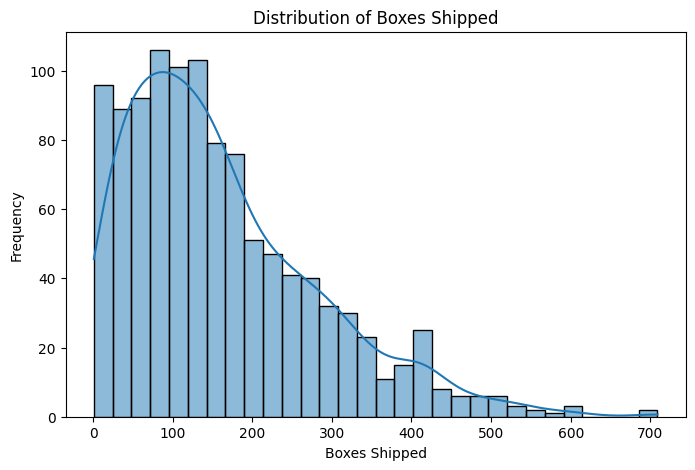

In [47]:
# Step 3: Visualize numeric distributions
plt.figure(figsize=(8, 5))
sns.histplot(df['Boxes Shipped'], bins=30, kde=True)
plt.title("Distribution of Boxes Shipped")
plt.xlabel("Boxes Shipped")
plt.ylabel("Frequency")
plt.show()

## Step 6: Prepare Features and Split the Data

To build a predictive model, we need to:

1. Select relevant features (independent variables) that influence demand.
2. Define the target variable (dependent variable) we want to predict.
3. Convert categorical features into numeric format using one-hot encoding.
4. Split the dataset into training (80%) and test (20%) sets using `train_test_split`.

For this project, we’ll use:
- Features: `Product`, `Country`, `Boxes Shipped`
- Target: `Amount` (as a proxy for demand)

We apply one-hot encoding to `Product` and `Country` to convert them into numeric format.

In [48]:
# Step 6: Prepare features and target
features = df[['Product', 'Country', 'Boxes Shipped']]
target = df['Amount']

# One-hot encode categorical features
features_encoded = pd.get_dummies(features, columns=['Product', 'Country'])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Confirm split sizes
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

print("y_train dtype:", y_train.dtype)
print("Bad values in y_train:", y_train[~y_train.apply(lambda x: isinstance(x, (int, float)))])


Training set size: 875
Test set size: 219
y_train dtype: int64
Bad values in y_train: Series([], Name: Amount, dtype: int64)


In [49]:
# Check for bad values in y_train
bad_y = y_train[~y_train.apply(lambda x: isinstance(x, (int, float)))]
print("Bad values in y_train:")
print(bad_y)

Bad values in y_train:
Series([], Name: Amount, dtype: int64)


## Step 7: Build and Train the Linear Regression Model

We use a linear regression model to predict `Amount` based on:

- Product type (one-hot encoded)
- Country (one-hot encoded)
- Boxes shipped

Steps:
1. Import `LinearRegression` from `sklearn.linear_model`
2. Create a model instance
3. Train the model using the training data (`X_train`, `y_train`)

In [ ]:
# Step 7: Build and train the model

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
